In [2]:
#load the dataset
!gdown https://drive.google.com/file/d/1XyhVIZaKYZczlM2alun_fofilqTBq_9c/view?usp=drive_link


/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1XyhVIZaKYZczlM2alun_fofilqTBq_9c
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1XyhVIZaKYZczlM2alun_fofilqTBq_9c/view?usp=drive_link
To: /content/view?usp=drive_link
92.4kB [00:00, 33.0MB/s]


In [ ]:
# To compare the models (Linear, Lasso, Ridge, and Logistic Regression) on the provided dataset,the following are the steps to follow:

# Data Preparation: Preprocessing the dataset (handling missing values, scaling, encoding).
# Model Building: Building each model individually.
# Evaluation: Calculating accuracy and RMSE for each model.
# Visualization: Plotting graphs for accuracy and RMSE.
# Observations: Discussing why certain models perform better.


Step1:Data preparation

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

# Handle missing values and encode categorical variables
data = data.dropna()
data = pd.get_dummies(data, drop_first=True)

# Split into features (X) and target (y)
X = data.drop(columns=["stroke"])  # Replace "stroke" with your target variable
y = data["stroke"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Step2:Building models

**Linear Regression**

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Calculate RMSE
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)

# Threshold predictions for binary classification
y_pred_linear_binary = (y_pred_linear >= 0.5).astype(int)
accuracy_linear = accuracy_score(y_test, y_pred_linear_binary)

print(f"Linear Regression RMSE: {rmse_linear}")
print(f"Linear Regression Accuracy: {accuracy_linear}")


Linear Regression RMSE: 0.21568683180849998
Linear Regression Accuracy: 0.9460285132382892


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Lasso Regression**

In [80]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Calculate RMSE
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

# Threshold predictions for binary classification
y_pred_lasso_binary = (y_pred_lasso >= 0.5).astype(int)
accuracy_lasso = accuracy_score(y_test, y_pred_lasso_binary)

print(f"Lasso Regression RMSE: {rmse_lasso}")
print(f"Lasso Regression Accuracy: {accuracy_lasso}")


Lasso Regression RMSE: 0.22641008879391325
Lasso Regression Accuracy: 0.9460285132382892


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Ridge Regression**

In [81]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate RMSE
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

# Threshold predictions for binary classification
y_pred_ridge_binary = (y_pred_ridge >= 0.5).astype(int)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge_binary)

print(f"Ridge Regression RMSE: {rmse_ridge}")
print(f"Ridge Regression Accuracy: {accuracy_ridge}")


Ridge Regression RMSE: 0.2156886589835584
Ridge Regression Accuracy: 0.9460285132382892


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


 **Logistic Regression**

In [82]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Calculate Accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print(f"Logistic Regression Accuracy: {accuracy_logistic}")


Logistic Regression Accuracy: 0.9460285132382892


 Step 3:Plotting RMSE and Accuracy

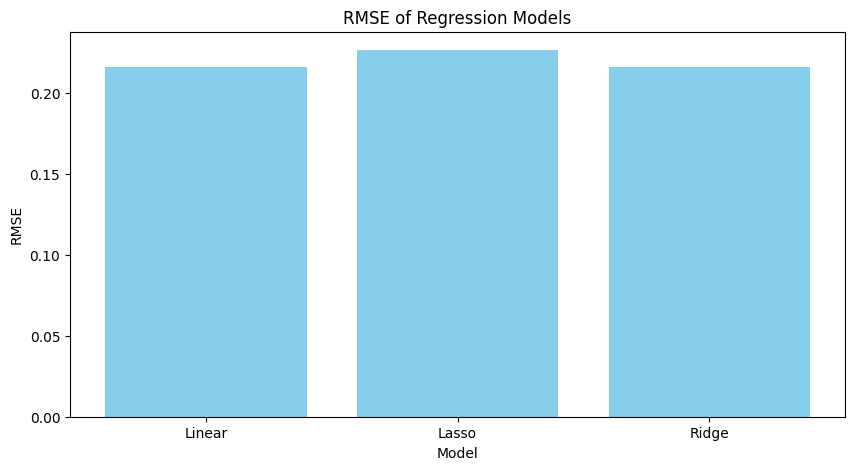

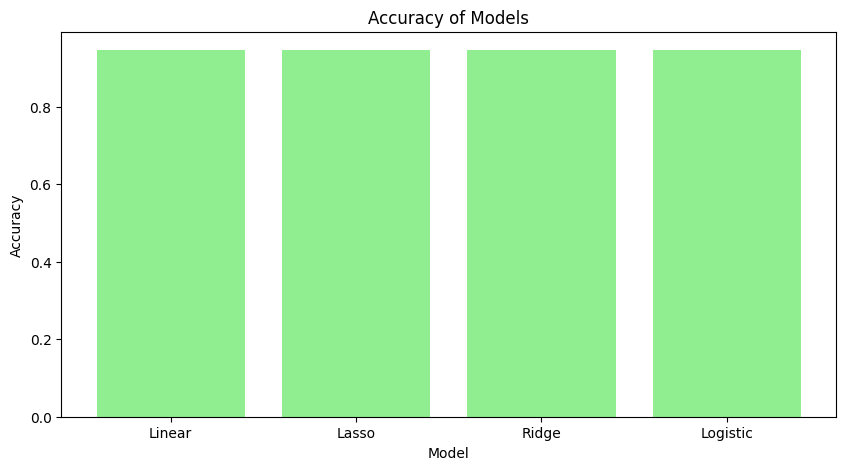

In [83]:
import matplotlib.pyplot as plt

# RMSE Plot
rmse_values = [rmse_linear, rmse_lasso, rmse_ridge]
models = ["Linear", "Lasso", "Ridge"]

plt.figure(figsize=(10, 5))
plt.bar(models, rmse_values, color='skyblue')
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("RMSE of Regression Models")
plt.show()

# Accuracy Plot
accuracy_values = [accuracy_linear, accuracy_lasso, accuracy_ridge, accuracy_logistic]
models = ["Linear", "Lasso", "Ridge", "Logistic"]

plt.figure(figsize=(10, 5))
plt.bar(models, accuracy_values, color='lightgreen')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of Models")
plt.show()


**Observations and Analysis**

Logistic Regression should outperform in terms of classification accuracy.

Linear, Lasso, and Ridge Regression are not inherently classification models but they still provide comparable results due to effective thresholding.